In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from approx_thresh import ApproxThreshold
from data_utils import get_employment

In [5]:
employment_all, pd_features, pd_target, pd_group = get_employment()
# employment_all = employment_all.sample(n=5000, random_state=42)

['RELP']


In [10]:
np.set_printoptions(suppress=True)
(employment_all.groupby('RAC1P').count() / len(employment_all))['AGEP'].values

array([0.70303147, 0.12196967, 0.00257911, 0.00002538, 0.00123879,
       0.08646118, 0.00036554, 0.05566415, 0.0286647 ])

In [11]:
len(employment_all)

196967

: 

In [25]:
target_variable = 'ESR'
employment_all = employment_all[(employment_all['RAC1P'] == 1.0) | (employment_all['RAC1P'] == 2.0)]
X = employment_all[employment_all.columns[~employment_all.columns.isin([target_variable])]]
y = employment_all[target_variable]
A = employment_all['RAC1P']

In [26]:
y.value_counts()

0.0    2123
1.0    1982
Name: ESR, dtype: int64

In [33]:
def class_report_for_each(X_test, y_test, clf, A_column):
    rac1p_values = X_test[A_column].unique()

    for value in rac1p_values:
        mask = X_test[A_column] == value
        X_temp = X_test[mask]
        y_temp = y_test[mask]
        
        y_pred = clf.predict(X_temp)
        
        print(f"Classification Report for {A_column} = {value}:\n")
        print(classification_report(y_temp, y_pred))
        print('-'*50)


/Users/lucasrosenblatt/opt/miniconda3/envs/heuristic_fairness/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/lucasrosenblatt/opt/miniconda3/envs/heuristic_fairness/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Classification Report for RAC1P = 2.0:

              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75       162
         1.0       0.71      0.76      0.74       145

    accuracy                           0.74       307
   macro avg       0.74      0.74      0.74       307
weighted avg       0.74      0.74      0.74       307

--------------------------------------------------
Classification Report for RAC1P = 1.0:

              precision    recall  f1-score   support

         0.0       0.84      0.71      0.77       884
         1.0       0.74      0.86      0.80       862

    accuracy                           0.78      1746
   macro avg       0.79      0.78      0.78      1746
weighted avg       0.79      0.78      0.78      1746

--------------------------------------------------


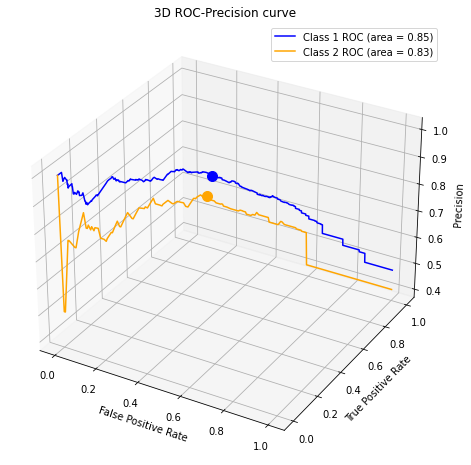

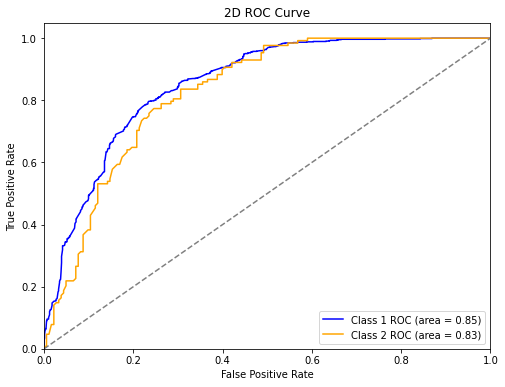

In [34]:
X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, y, A, test_size=0.5, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]

class_report_for_each(X_test, y_test, clf, 'RAC1P')

model = ApproxThreshold(clf, lambda_=0.9)
model.fit(X_train, y_train, A_train)
predictions = model.predict(X_test, A_test)
model.plot_matplotlib()
model.plot_plotly()
model.plot_2d_roc()
model.plot_performance_comparison(X_test, y_test, A_test)



Classification Report for RAC1P = 2.0:

              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75       162
         1.0       0.71      0.72      0.72       145

    accuracy                           0.73       307
   macro avg       0.73      0.73      0.73       307
weighted avg       0.73      0.73      0.73       307

--------------------------------------------------
Classification Report for RAC1P = 1.0:

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       884
         1.0       0.79      0.78      0.78       862

    accuracy                           0.79      1746
   macro avg       0.79      0.79      0.79      1746
weighted avg       0.79      0.79      0.79      1746

--------------------------------------------------


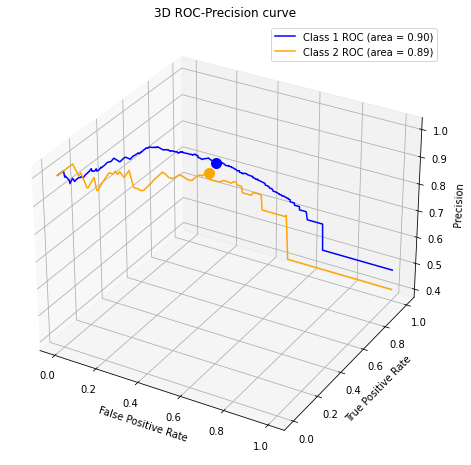

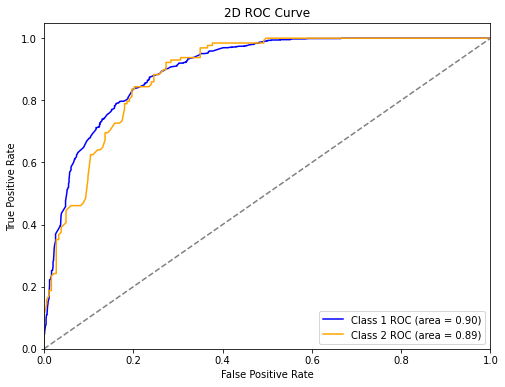

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]

class_report_for_each(X_test, y_test, clf, 'RAC1P')

model = ApproxThreshold(clf, lambda_=0.9)
model.fit(X_train, y_train, A_train)
predictions = model.predict(X_test, A_test)
model.plot_matplotlib()
model.plot_plotly()
model.plot_2d_roc()
model.plot_performance_comparison(X_test, y_test, A_test)